In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

MODEL BUILDING

In [2]:
df = pd.read_csv('Churn_data.csv')
df.head()

,Unnamed: 0,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


In [3]:
df = df.drop(['Unnamed: 0'],axis=1)

In [4]:
df.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


In [5]:
x = df.drop(['Exited'], axis = 1)
y = df[['Exited']]

In [6]:
x_train , x_test , y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=45)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(acc)


0.7905


/home/archit/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
confusion_matrix(y_test, y_pred)

array([[1581,    0],
       [ 419,    0]])

<Axes: >

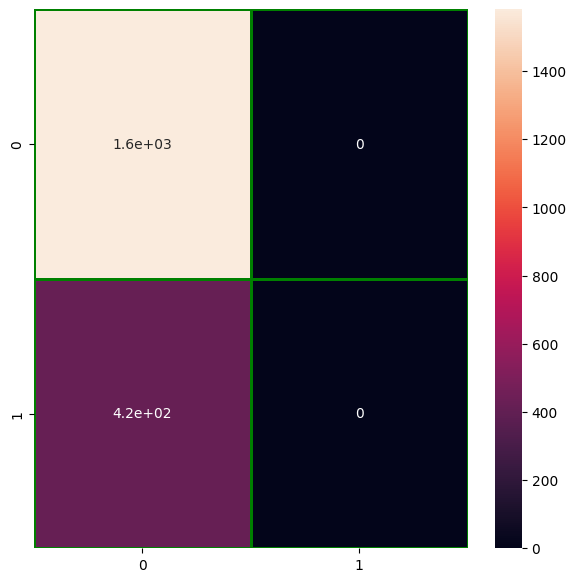

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,7))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cbar=True,linewidths='1',linecolor='green')

In [10]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1581
           1       0.00      0.00      0.00       419

    accuracy                           0.79      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.62      0.79      0.70      2000



/home/archit/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/archit/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/archit/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)
pred_using_randomForest = rfc.predict(x_test)

acc_randomForest = accuracy_score(y_test,pred_using_randomForest)
print(acc_randomForest)

/home/archit/.local/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.86


In [12]:
confusion_matrix(y_test, pred_using_randomForest)

array([[1538,   43],
       [ 237,  182]])

<Axes: >

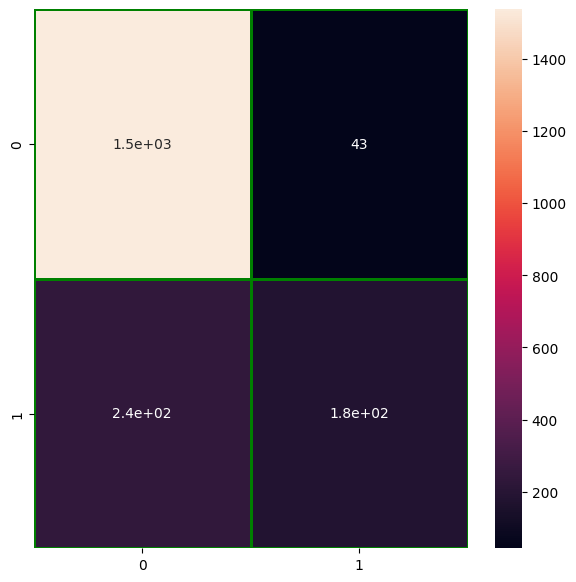

In [13]:
plt.figure(figsize=(7,7))
sns.heatmap(confusion_matrix(y_test,pred_using_randomForest),annot=True,cbar=True,linewidths='1',linecolor='green')

In [14]:
print(classification_report(y_test,pred_using_randomForest))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1581
           1       0.81      0.43      0.57       419

    accuracy                           0.86      2000
   macro avg       0.84      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000



In [15]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.fit(x_train,y_train)
pred_using_GB = gradient_booster.predict(x_test)

acc_GB = accuracy_score(y_test,pred_using_GB)
print(acc_GB)

/home/archit/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.864


In [16]:
confusion_matrix(y_test,pred_using_GB)

array([[1535,   46],
       [ 226,  193]])

<Axes: >

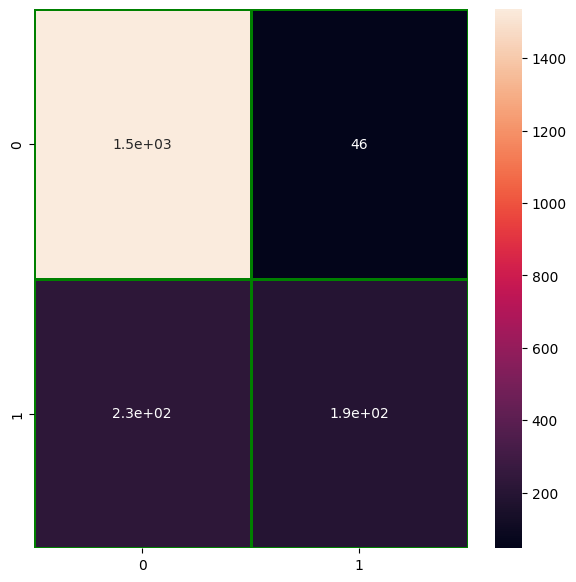

In [17]:
plt.figure(figsize=(7,7))
sns.heatmap(confusion_matrix(y_test,pred_using_GB),annot=True,cbar=True,linewidths='1',linecolor='green')

In [18]:
print(classification_report(y_test,pred_using_GB))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1581
           1       0.81      0.46      0.59       419

    accuracy                           0.86      2000
   macro avg       0.84      0.72      0.75      2000
weighted avg       0.86      0.86      0.85      2000

